<a href="https://colab.research.google.com/github/Faisal-Al-Mamun/Sentiment-Classification-of-Movie-Review-using-NLP-LogisticRegression/blob/main/Sentiment_Classification_of_Movie_Review_using_NLP_%26_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Loading Data on Google Colab from Google Drive

In [6]:
!cp -r "/content/drive/MyDrive/Colab Notebooks/NLP/txt_sentoken.zip" "/content/"

In [ ]:
!unzip 'txt_sentoken.zip'

Polarity Dataset v2.0 Downloaded from Internet
Link:- https://www.cs.cornell.edu/people/pabo/movie-review-data/

### Importing the libraries

In [13]:
import numpy as np
import re
import pickle 
import nltk
from nltk.corpus import stopwords

from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sn
import matplotlib.pyplot as plt

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### Importing the dataset

In [9]:
reviews = load_files('txt_sentoken/')
X, y = reviews.data, reviews.target

### Creating the corpus


In [11]:
corpus = []
for i in range(0, 2000):
    review = re.sub(r'\W', ' ', str(X[i]))
    review = review.lower()
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'\s+br\s+',' ',review)
    review = re.sub(r'\s+[a-z]\s+', ' ',review)
    review = re.sub(r'^b\s+', '', review)
    review = re.sub(r'\s+', ' ', review)
    corpus.append(review) 

### Creating the Tf-Idf model 


In [14]:
vectorizer = TfidfVectorizer(max_features = 2000, min_df = 3, max_df = 0.6, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(corpus).toarray()

### Splitting the dataset into the Training set and Test set



In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

### Training the classifier


In [16]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

### Testing model performance


In [17]:
y_pred = classifier.predict(X_test)

### F1 Score and Confusion Matrix

In [23]:
CM = confusion_matrix(y_test, y_pred)

In [27]:
total_correct_pred = CM[0][0]+CM[1][1]

print("Total Correct Prediction:",total_correct_pred)

Accuracy = total_correct_pred/4

print("Test Accuracy:",Accuracy)

Total Correct Prediction: 339
Test Accuracy: 84.75


In [29]:
class_names = ['Negative Review', 'Positive Review']

print(classification_report(y_test, y_pred, target_names=class_names))   

                 precision    recall  f1-score   support

Negative Review       0.89      0.81      0.85       208
Positive Review       0.81      0.89      0.85       192

       accuracy                           0.85       400
      macro avg       0.85      0.85      0.85       400
   weighted avg       0.85      0.85      0.85       400



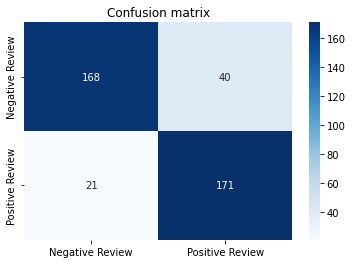

In [30]:
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           cmap= "Blues", 
           annot_kws={"size": 10},
            fmt='', 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()


### Saving our classifier and Tfidf model for future use

In [31]:
with open('Sentiment Classifier.pickle','wb') as f:
    pickle.dump(classifier,f)

In [35]:
# Saving the Tf-Idf model
with open('tfidfmodel.pickle','wb') as f:
    pickle.dump(vectorizer,f)

### Using our classifier and Tfidf model


In [34]:
with open('Sentiment Classifier.pickle','rb') as f:
    clf = pickle.load(f)

In [36]:
with open('tfidfmodel.pickle','rb') as f:
    tfidf = pickle.load(f)

### Single Prediction Check

In [40]:
sample = ["This is the worst movie I've ever watched."]
sample = tfidf.transform(sample).toarray()
sentiment = clf.predict(sample)

print(sentiment)

if sentiment == 1:
  print("Postive Review")
else:
 print("Negative Review")

[0]
Negative Review
